In [1]:
"""
Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
sklearn.datasets.
"""
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
k = 3  # You can experiment with different values of k
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of KNN classifier on test set: {accuracy * 100:.2f}%")

# Optionally, print the predicted vs actual labels
df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})
print(df.head())


Accuracy of KNN classifier on test set: 100.00%
   Predicted  Actual
0          1       1
1          0       0
2          2       2
3          1       1
4          1       1


In [3]:
"""
Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in
sklearn.datasets.
"""
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.datasets import load_boston # This line is removed as load_boston is deprecated
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset instead of the Boston dataset
# !pip install -U scikit-learn
from sklearn.datasets import fetch_california_housing # Importing fetch_california_housing

# Fetch the California housing dataset
housing = fetch_california_housing()
X = housing.data  # Features
y = housing.target  # Target values (housing prices)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN regressor
k = 5  # You can experiment with different values of k
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f"Mean Squared Error of KNN regressor: {mse:.2f}")

# Optionally, print the predicted vs actual values
df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})
print(df.head())

Mean Squared Error of KNN regressor: 0.43
   Predicted   Actual
0   0.498800  0.47700
1   0.764600  0.45800
2   4.750006  5.00001
3   2.807800  2.18600
4   2.726200  2.78000


Optimal value of K: 6


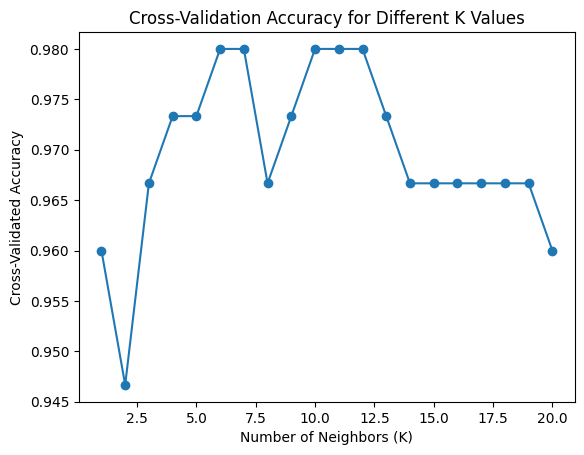

In [4]:
"""
Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
cross-validation on load_iris dataset in sklearn.datasets.
"""
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# List of possible k values to test
k_values = range(1, 21)  # Testing K values from 1 to 20

# Initialize a list to store the cross-validation scores
cv_scores = []

# Loop over each k value and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 5-fold cross-validation and calculate mean accuracy score
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())  # Store the mean of the cross-validation scores

# Find the optimal k value (the one with the highest accuracy)
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal value of K: {optimal_k}")

# Optionally, plot the results
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.show()


In [6]:
"""
Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
sklearn.datasets.
"""
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the California housing dataset instead of the Boston dataset
# !pip install -U scikit-learn
from sklearn.datasets import fetch_california_housing # Importing fetch_california_housing

# Fetch the California housing dataset
housing = fetch_california_housing()
X = housing.data  # Features
y = housing.target  # Target values (housing prices)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN regressor
k = 5  # You can experiment with different values of k
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f"Mean Squared Error of KNN regressor: {mse:.2f}")

# Optionally, print the predicted vs actual values
df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})
print(df.head())


Mean Squared Error of KNN regressor: 0.43
   Predicted   Actual
0   0.498800  0.47700
1   0.764600  0.45800
2   4.750006  5.00001
3   2.807800  2.18600
4   2.726200  2.78000


In [8]:
"""
Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
load_iris dataset in sklearn.datasets.
"""
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier with weighted voting
k = 5  # You can experiment with different values of k
knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  # 'distance' enables weighted voting

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of KNN classifier with weighted voting: {accuracy * 100:.2f}%")

# Optionally, print the predicted vs actual labels
df = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test
})
print(df.head())


Accuracy of KNN classifier with weighted voting: 100.00%
   Predicted  Actual
0          1       1
1          0       0
2          2       2
3          1       1
4          1       1


In [9]:
# Q6. Implement a function to standardise the features before applying KNN classifier.
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def knn_with_standardization(X, y, k=5):
    """
    This function standardizes the features and then applies the KNN classifier.

    Parameters:
    - X: Features (numpy array or pandas DataFrame)
    - y: Target labels (numpy array or pandas Series)
    - k: The number of neighbors for KNN (default is 5)

    Returns:
    - accuracy: The accuracy of the KNN classifier on the test set
    """
    # Standardize the features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Apply KNN classifier with feature standardization
accuracy = knn_with_standardization(X, y, k=5)

# Print the accuracy
print(f"Accuracy of KNN classifier with standardized features: {accuracy * 100:.2f}%")


Accuracy of KNN classifier with standardized features: 100.00%


In [10]:
# Q6. Implement a function to standardise the features before applying KNN classifier.
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def knn_with_standardization(X, y, k=5):
    """
    This function standardizes the features and then applies the KNN classifier.

    Parameters:
    - X: Features (numpy array or pandas DataFrame)
    - y: Target labels (numpy array or pandas Series)
    - k: The number of neighbors for KNN (default is 5)

    Returns:
    - accuracy: The accuracy of the KNN classifier on the test set
    """
    # Standardize the features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Apply KNN classifier with feature standardization
accuracy = knn_with_standardization(X, y, k=5)

# Print the accuracy
print(f"Accuracy of KNN classifier with standardized features: {accuracy * 100:.2f}%")


Accuracy of KNN classifier with standardized features: 100.00%


In [12]:
# Q7. Write a Python function to calculate the euclidean distance between two points.
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.

    Parameters:
    - point1: A list or numpy array representing the first point (x1, y1, ..., zn)
    - point2: A list or numpy array representing the second point (x2, y2, ..., zn)

    Returns:
    - distance: The Euclidean distance between point1 and point2
    """
    # Convert the points into numpy arrays for easier manipulation
    point1 = np.array(point1)
    point2 = np.array(point2)

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))

    return distance

# Example usage
point1 = [1, 2, 3]
point2 = [4, 5, 6]

distance = euclidean_distance(point1, point2)
print(f"Euclidean distance between {point1} and {point2} is: {distance:.2f}")


Euclidean distance between [1, 2, 3] and [4, 5, 6] is: 5.20


In [13]:
# Q8. Write a Python function to calculate the manhattan distance between two points.
import numpy as np

def manhattan_distance(point1, point2):
    """
    This function calculates the Manhattan distance between two points.

    Parameters:
    - point1: First point (numpy array or list)
    - point2: Second point (numpy array or list)

    Returns:
    - Manhattan distance between point1 and point2
    """
    # Convert points to numpy arrays to support element-wise operations
    point1 = np.array(point1)
    point2 = np.array(point2)

    # Calculate the Manhattan distance
    distance = np.sum(np.abs(point1 - point2))

    return distance

# Example usage
point1 = [1, 2, 3]
point2 = [4, 5, 6]

distance = manhattan_distance(point1, point2)
print(f"Manhattan distance between {point1} and {point2}: {distance}")


Manhattan distance between [1, 2, 3] and [4, 5, 6]: 9
